In [1]:
import pandas as pd

# Load Dataset :

In [2]:
data = pd.read_csv(r'../input/urbansound8k/UrbanSound8K.csv')
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [3]:
data.shape

(8732, 8)

# Librosa (to deal with audio file) :

In [4]:
import librosa

In [5]:
# audio = audio signal or amtitude of waveform in 1d array shape
# sample_rate = How many samples are recorded per second
audio, sample_rate = librosa.load('../input/urbansound8k/fold1/101415-3-0-2.wav', res_type='kaiser_fast')

In [6]:
audio.shape

(88200,)

In [7]:
 duration_of_audio = audio.shape[0] / sample_rate

In [8]:
audio

array([-0.00010893, -0.00017632, -0.00017818, ..., -0.04449912,
       -0.04784342, -0.04944142], dtype=float32)

# Waveplot of Audio :

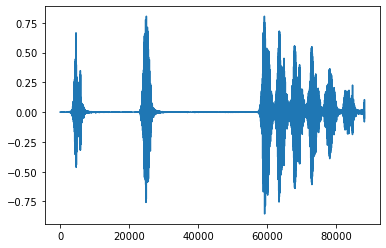

In [9]:
import matplotlib.pyplot as plt
plt.plot(audio)

In [21]:
import librosa.display

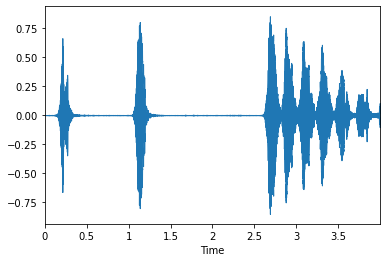

In [22]:
librosa.display.waveplot(y=audio, sr=sample_rate)

In [23]:
import IPython.display

In [24]:
IPython.display.Audio(audio, rate=sample_rate)

In [25]:
sample_rate

22050

# Feature Extraction from Audio :


In [26]:
# mfcc = Mel Frequency Cepstral Coefficient 
feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)

In [27]:
feature

array([[-5.21274780e+02, -5.19199158e+02, -5.18593994e+02, ...,
        -4.35636108e+02, -3.92640961e+02, -3.54826752e+02],
       [ 1.43386354e+01,  1.71788025e+01,  1.81046925e+01, ...,
         1.13760315e+02,  1.51305023e+02,  1.80120178e+02],
       [ 1.35271091e+01,  1.61215820e+01,  1.72600594e+01, ...,
         6.42747345e+01,  6.28363266e+01,  5.56611938e+01],
       ...,
       [-9.69052911e-01, -2.43224263e+00, -2.86061764e+00, ...,
         6.59458733e+00, -2.28062487e+00, -8.35599327e+00],
       [-9.37087059e-01, -2.33085752e+00, -2.82841778e+00, ...,
         3.93495560e+00, -3.64556742e+00, -8.21616077e+00],
       [-8.24182451e-01, -2.16242456e+00, -2.74057913e+00, ...,
         1.62604892e+00,  4.63671744e-01, -2.82021332e+00]], dtype=float32)

In [28]:
feature.shape

(50, 173)

## Extracted Feature Plotting :

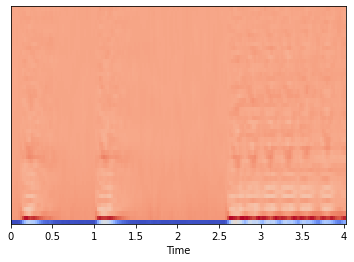

In [29]:
librosa.display.specshow(feature, sr=sample_rate, x_axis='time')

In [30]:
# Feature Scaling :
import sklearn.preprocessing

In [ ]:
scaled_feature = sklearn.preprocessing.scale(feature, axis=1)

In [ ]:
librosa.display.specshow(scaled_feature, sr=sample_rate, x_axis='time')

In [ ]:
np.mean(scaled_feature.T, axis=0).shape

# Merging Path :

In [32]:
Directory = '../input/urbansound8k/'

In [33]:
from tqdm import tqdm

In [ ]:
r = tqdm(data.iterrows())

In [ ]:
for i,r in tqdm(data.iterrows()):
    print(i,r)
    break

In [34]:
import os

# Feed Extracted feature & Class :

In [35]:
extracted_data = []
for index,row in tqdm(data.iterrows()):
    file_name = os.path.join(os.path.abspath(Directory),'fold'+str(row['fold'])+'/',str(row["slice_file_name"]))
    class_labels= row["class"]
    y,sr = librosa.load(file_name, res_type='kaiser_fast')
    feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50)
    scaled_feature = np.mean(feature.T,axis=0)
    extracted_data.append([scaled_feature, class_labels])

3555it [07:33,  7.73it/s]/opt/conda/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8324it [17:27, 11.17it/s]/opt/conda/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8327it [17:27, 14.52it/s]/opt/conda/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [18:16,  7.96it/s]


In [36]:

np.array(extracted_data).shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(8732, 2)

In [37]:
feature_df = pd.DataFrame(extracted_data, columns=['feature','class'])

In [38]:
feature_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [39]:
feature_df['feature'].shape

(8732,)

In [40]:
feature_df['feature'][0][0]

-215.79301

In [41]:
feature_df['feature'][0]

array([-2.1579301e+02,  7.1666122e+01, -1.3181377e+02, -5.2091331e+01,
       -2.2115967e+01, -2.1764179e+01, -1.1183748e+01,  1.8912683e+01,
        6.7266383e+00,  1.4556893e+01, -1.1782046e+01,  2.3010368e+00,
       -1.7251303e+01,  1.0052423e+01, -6.0094991e+00, -1.3153193e+00,
       -1.7693510e+01,  1.1171224e+00, -4.3699460e+00,  7.2629523e+00,
       -1.1815971e+01, -7.4952617e+00,  5.4577127e+00, -2.9442444e+00,
       -5.8693886e+00, -9.8653622e-02, -3.2121711e+00,  4.6092515e+00,
       -5.8293266e+00, -5.3475084e+00,  1.3341196e+00,  7.1307821e+00,
       -7.9449929e-02,  1.7109244e+00, -5.6942000e+00, -2.9041717e+00,
        3.0366952e+00, -1.6827590e+00, -8.8585824e-01,  3.5438862e-01,
        1.2312773e+00,  9.8098689e-01, -4.0162473e+00, -5.1949048e+00,
       -4.9417014e+00, -3.5509828e-01, -4.9052806e+00,  6.5518570e-01,
       -4.3962913e+00,  1.6004074e+00], dtype=float32)

In [42]:
feature_df['feature'][0].shape

(50,)

In [43]:
feature_df['feature'].shape

(8732,)

In [44]:
x = np.array(feature_df['feature'].tolist())

In [45]:
x.shape

(8732, 50)

In [46]:
x[0]

array([-2.1579301e+02,  7.1666122e+01, -1.3181377e+02, -5.2091331e+01,
       -2.2115967e+01, -2.1764179e+01, -1.1183748e+01,  1.8912683e+01,
        6.7266383e+00,  1.4556893e+01, -1.1782046e+01,  2.3010368e+00,
       -1.7251303e+01,  1.0052423e+01, -6.0094991e+00, -1.3153193e+00,
       -1.7693510e+01,  1.1171224e+00, -4.3699460e+00,  7.2629523e+00,
       -1.1815971e+01, -7.4952617e+00,  5.4577127e+00, -2.9442444e+00,
       -5.8693886e+00, -9.8653622e-02, -3.2121711e+00,  4.6092515e+00,
       -5.8293266e+00, -5.3475084e+00,  1.3341196e+00,  7.1307821e+00,
       -7.9449929e-02,  1.7109244e+00, -5.6942000e+00, -2.9041717e+00,
        3.0366952e+00, -1.6827590e+00, -8.8585824e-01,  3.5438862e-01,
        1.2312773e+00,  9.8098689e-01, -4.0162473e+00, -5.1949048e+00,
       -4.9417014e+00, -3.5509828e-01, -4.9052806e+00,  6.5518570e-01,
       -4.3962913e+00,  1.6004074e+00], dtype=float32)

In [47]:
x[0][0]

-215.79301

In [48]:
target = np.array(feature_df['class'].tolist())

In [49]:
target = 

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

## Validation Split :

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
y_new = pd.get_dummies(target)
y_new.shape

(8732, 10)

In [80]:
y_new.head()

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y_new, test_size=0.2, random_state=11)

In [53]:
x_train.shape, x_test.shape

((6985, 50), (1747, 50))

In [54]:
x_train[0].shape

(50,)

In [56]:
np.array(x_train).reshape(6985,1,50)

array([[[-1.0855587e+02,  1.6921422e+02, -4.3540932e+01, ...,
         -1.5017787e+00, -9.4632733e-01,  3.5372630e-01]],

       [[-9.7056610e+01,  1.5036140e+02, -4.5157337e+01, ...,
         -1.2054801e+00,  3.6692784e+00,  5.3195877e+00]],

       [[-2.5024196e+02,  1.1231139e+02, -2.8896736e+01, ...,
         -2.2936080e+00, -2.5525298e+00, -1.1773063e+00]],

       ...,

       [[-2.5013206e+02,  6.1237301e+01, -3.1349024e+01, ...,
          1.7736355e+00,  2.6240346e+00,  1.5990740e+00]],

       [[-3.2517725e+02,  1.4707008e+02, -2.5730570e+01, ...,
         -2.3111732e+00,  1.5356618e+00, -2.1968293e-01]],

       [[-2.8525415e+02,  2.1069640e+02, -1.1573458e+02, ...,
          4.1985860e+00,  2.5012779e+00,  3.7130854e+00]]], dtype=float32)

# Bi-Directional LSTM :

In [57]:
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Flatten, Dropout
from keras.models import Sequential
import keras
import tensorflow as tf
from tensorflow.keras import Input, Model

In [63]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,50)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True, recurrent_dropout=0.1)))
model.add(Flatten())
# model.add(Dense(256, activation='sigmoid'))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='sigmoid'))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='sigmoid'))
# model.add(Dropout(0.5))
# model.add(Dense(90, activation='sigmoid'))
# model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1, 200)            120800    
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 122,810
Trainable params: 122,810
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Learning Rate Parameters:

In [65]:
from keras.callbacks import ReduceLROnPlateau

In [66]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5,min_lr=0.00001)

In [67]:
history = model.fit(np.array(x_train).reshape(6985,1,50), np.array(y_train), epochs=200, validation_data=(np.array(x_test).reshape(1747,1,50),np.array(y_test)), batch_size=32, callbacks=[learning_rate_reduction])

Epoch 1/200
219/219 [==============================] - 6s 8ms/step - loss: 1.8307 - accuracy: 0.3824 - val_loss: 1.1743 - val_accuracy: 0.6388
Epoch 2/200
219/219 [==============================] - 1s 5ms/step - loss: 1.1165 - accuracy: 0.6631 - val_loss: 0.9001 - val_accuracy: 0.7321
Epoch 3/200
219/219 [==============================] - 1s 5ms/step - loss: 0.8403 - accuracy: 0.7496 - val_loss: 0.7556 - val_accuracy: 0.7831
Epoch 4/200
219/219 [==============================] - 1s 5ms/step - loss: 0.7067 - accuracy: 0.7909 - val_loss: 0.6744 - val_accuracy: 0.7951
Epoch 5/200
219/219 [==============================] - 1s 5ms/step - loss: 0.6097 - accuracy: 0.8253 - val_loss: 0.6092 - val_accuracy: 0.8157
Epoch 6/200
219/219 [==============================] - 1s 5ms/step - loss: 0.5113 - accuracy: 0.8554 - val_loss: 0.5605 - val_accuracy: 0.8288
Epoch 7/200
219/219 [==============================] - 1s 5ms/step - loss: 0.4790 - accuracy: 0.8630 - val_loss: 0.5170 - val_accuracy: 0.8414

# Loss & Accuracy Plot :

Text(0, 0.5, 'Accuracy')

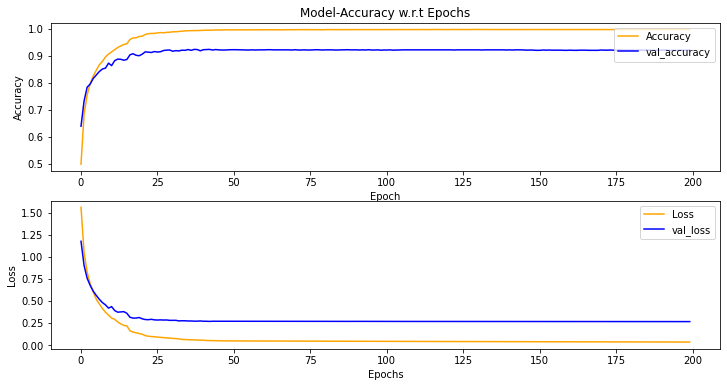

In [68]:
# visulize loss w.r.t epochs :
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,6))
ax2.plot(history.history['loss'], color='orange', label='Loss')
ax2.plot(history.history['val_loss'], color='blue', label='val_loss')
ax2.legend(loc='upper right')
ax1.plot(history.history['accuracy'], label='Accuracy', color='orange')
ax1.plot(history.history['val_accuracy'], label='val_accuracy', color='blue')
ax1.legend(loc="upper right")
ax1.set_title("Model-Accuracy w.r.t Epochs", loc='center')
plt.xlabel("Epochs")
plt.ylabel("Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")


# Prediction on Validation data :

In [69]:
y_pred = model.predict(np.array(x_test).reshape(1747, 1,50))

In [71]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [72]:
y_pred_classes

array([0, 2, 7, ..., 4, 0, 3])

In [74]:
y_true = np.argmax(np.array(y_test), axis=1)

In [75]:
y_true

array([9, 2, 7, ..., 4, 0, 3])

In [76]:
np.mean(y_pred_classes == y_true)

0.9215798511734402

# Confusion Matrix :

Text(0.5, 13.421126458070283, 'Predicted Label')

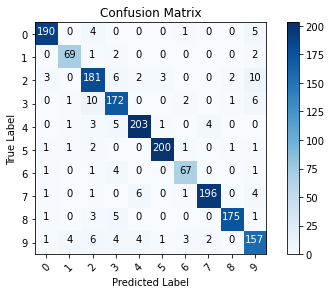

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_classes, y_true)
import itertools
plt.imshow(cm, cmap = plt.cm.Blues, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(range(10)))
plt.xticks(tick_marks, range(10), rotation=45)
plt.yticks(tick_marks, range(10))
thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i , cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

# Prediction :

In [100]:
filename = '../input/urbansound8k/fold7/101848-9-0-8.wav'
audio, sample_rate =  librosa.load(filename, res_type='kaiser_fast')
feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)
scaled_feature = np.mean(feature.T, axis=0)
prediction_feature = np.array(scaled_feature)
pred_vector = model.predict(prediction_feature.reshape(1,1,50))
pred_class = np.argmax(pred_vector)
print("Predicted Class is :", y_new.columns[pred_class])

Predicted Class is : street_music


In [99]:
IPython.display.Audio(audio, rate=sample_rate)